In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [19]:
# 
df = pd.read_csv('Apple_Stock_Price.csv')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10608 entries, 0 to 10607
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10608 non-null  object 
 1   Open       10608 non-null  float64
 2   High       10608 non-null  float64
 3   Low        10608 non-null  float64
 4   Close      10608 non-null  float64
 5   Adj Close  10608 non-null  float64
 6   Volume     10608 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 580.3+ KB


In [15]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [17]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10608.000000,10608.000000,10608.000000,10608.000000,10608.000000,1.060800e+04
mean,16.689173,16.879955,16.500822,16.697362,16.027345,3.275098e+08
std,35.450519,35.882848,35.031289,35.473912,35.154878,3.378203e+08
min,0.049665,0.049665,0.049107,0.049107,0.038213,0.000000e+00
25%,0.287946,0.296875,0.282355,0.288923,0.238909,1.213044e+08
50%,0.488839,0.495536,0.480446,0.487701,0.404851,2.145976e+08
75%,16.320893,16.418483,16.151249,16.269554,14.073167,4.066804e+08
max,182.630005,182.940002,179.119995,182.009995,180.959747,7.421641e+09


In [ ]:
# Les types de données sont des float, int, str

In [21]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

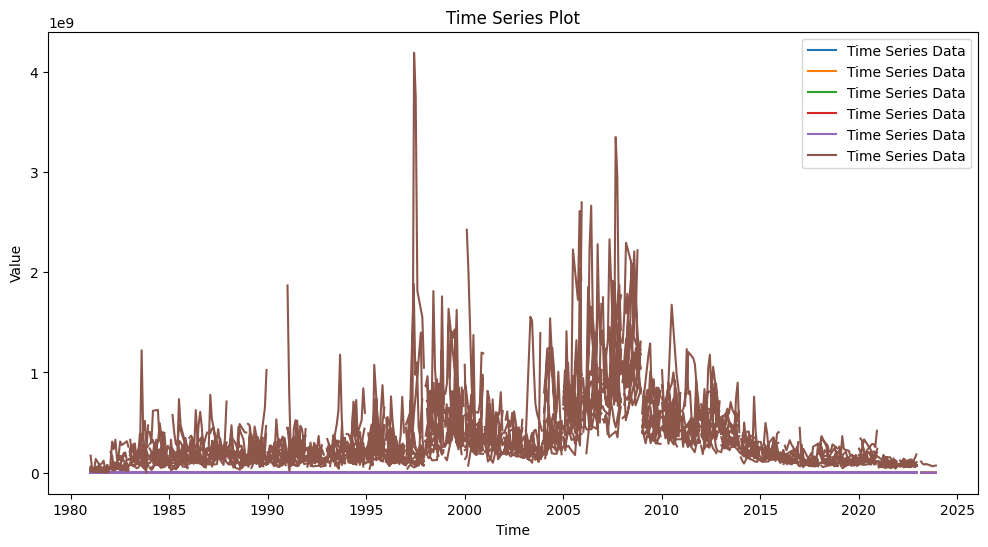

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df, label="Time Series Data")
plt.title("Time Series Plot")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

In [26]:
# Pour les modèles de stats
# import statsmodels.api as sm

In [27]:
#  Decomposition trend
# decomposition = sm.tsa.seasonal_decompose(df, model='additive', period=12)  # Adjust period based on frequency

# plt.figure(figsize=(12, 8))
# plt.subplot(411)
# plt.plot(df, label='Original')
# plt.legend(loc='best')

# plt.subplot(412)
# plt.plot(decomposition.trend, label='Trend')
# plt.legend(loc='best')

# plt.subplot(413)
# plt.plot(decomposition.seasonal, label='Seasonality')
# plt.legend(loc='best')

# plt.subplot(414)
# plt.plot(decomposition.resid, label='Residuals')
# plt.legend(loc='best')

# plt.tight_layout()
# plt.show()


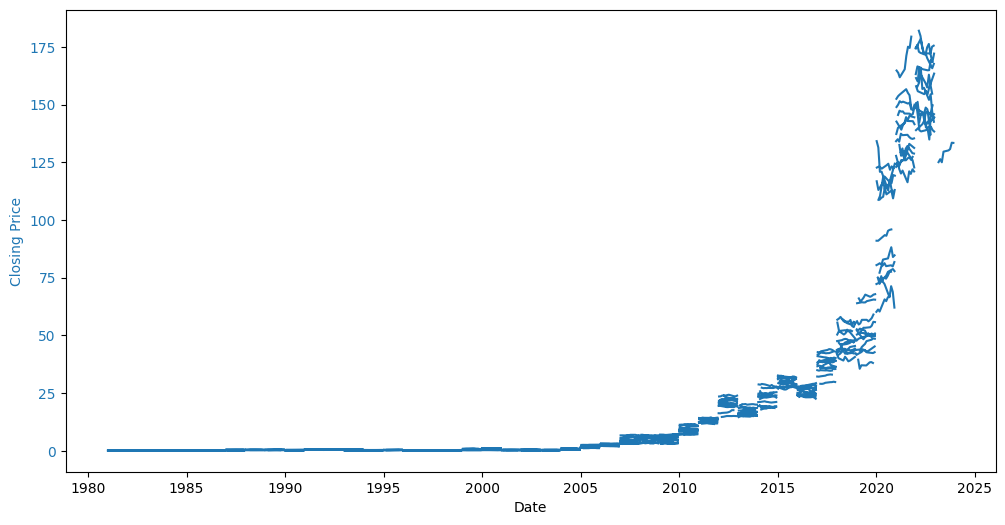

In [ ]:
# Plot Closing Price and Traded Volume
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Closing Price
ax1.set_xlabel("Date")
ax1.set_ylabel("Close", color="tab:blue")
ax1.plot(df.index, df["Close"], color="tab:blue", label="Closing Price")
ax1.tick_params(axis="y", labelcolor="tab:blue")

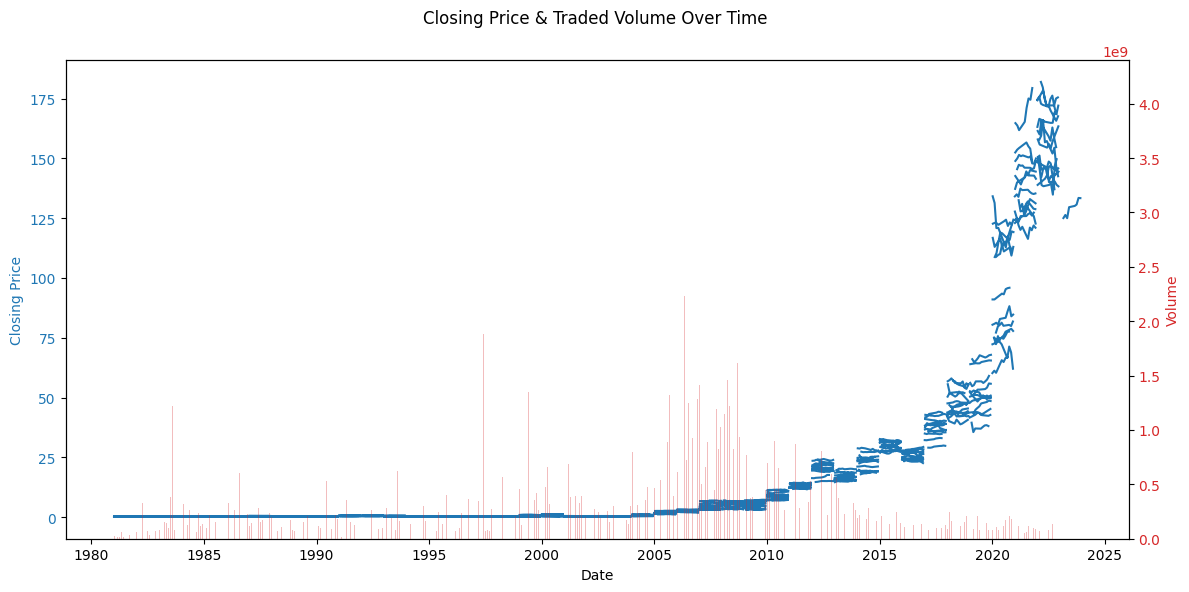

In [ ]:
# Plot Closing Price et Traded Volume
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Closing Price
ax1.set_xlabel("Date")
ax1.set_ylabel("Closing Price", color="tab:blue")
ax1.plot(df.index, df["Close"], color="tab:blue", label="Closing Price")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Utilisation de twin y-axis pour créer deux axes et avoir une meilleure visualisation
ax2 = ax1.twinx()
ax2.set_ylabel("Volume", color="tab:red")
ax2.bar(df.index, df["Volume"], color="tab:red", alpha=0.3, label="Traded Volume")
ax2.tick_params(axis="y", labelcolor="tab:red")

fig.suptitle("Closing Price & Traded Volume dans le temps")
fig.tight_layout()
plt.show()

In [40]:
pip install mplfinance

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: mplfinance in c:\users\bintu\appdata\local\programs\python\python313\lib\site-packages (0.12.10b0)




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\bintu\AppData\Local\Programs\Python\Python313\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


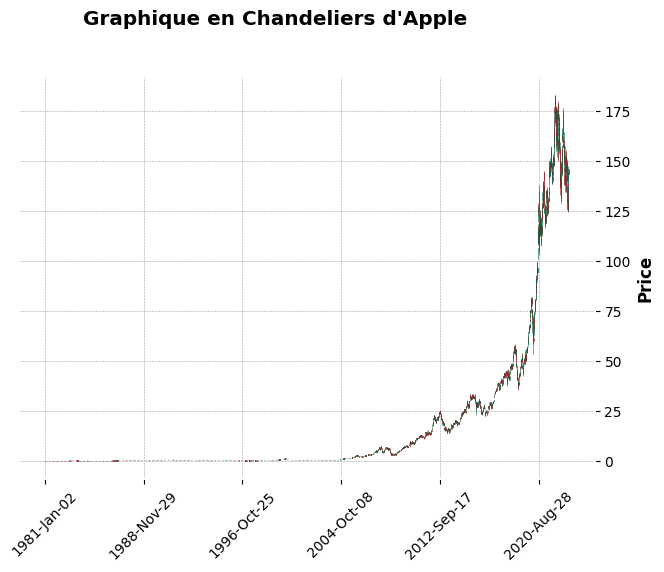

In [50]:
import mplfinance as mpf

# Afficher un graphique en chandeliers
df = pd.read_csv("Apple_Stock_Price.csv", parse_dates=["Date"], dayfirst=True)
df.set_index("Date", inplace=True)
mpf.plot(df.iloc[:], type='candle', style='charles', title="Graphique en Chandeliers d'Apple")

c:\Users\bintu\AppData\Local\Programs\Python\Python313\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


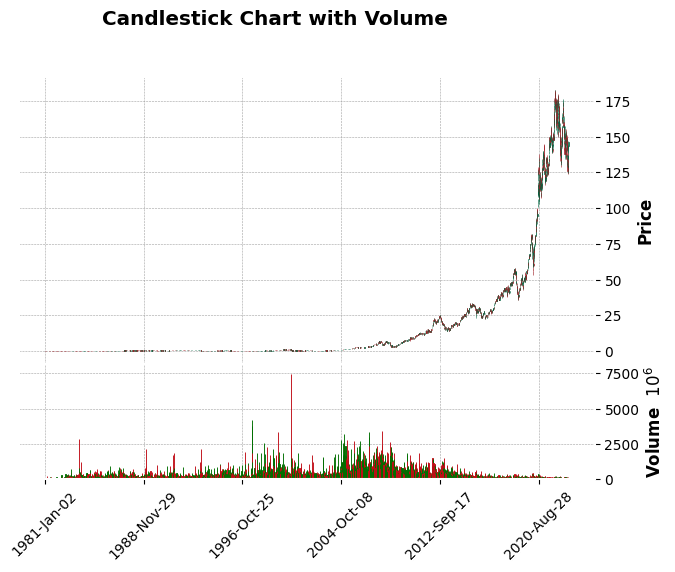

In [51]:
mpf.plot(df, type='candle', style='charles', volume=True, title="Candlestick Chart with Volume", ylabel='Price')

In [54]:
# Statistical Analysis
# Compute summary statistics (mean, median, standard deviation) for key columns.
df['Close']

Date
1981-01-02      0.154018
1981-01-05      0.150670
1981-01-06      0.143973
1981-01-07      0.137835
1981-01-08      0.135045
                 ...    
2023-01-23    141.110001
2023-01-24    142.529999
2023-01-25    141.860001
2023-01-26    143.960007
2023-01-27    145.929993
Name: Close, Length: 10608, dtype: float64

In [ ]:
# Analyze closing prices with a moving average.
# dix = df['Volume'].rolling(window=10).mean()  # 10-day MA
# cinq = df['Volume'].rolling(window=50).mean()  # 50-day MA (longer trend)

In [ ]:
# Compute summary statistics (mean, median, standard deviation) for key columns.

# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

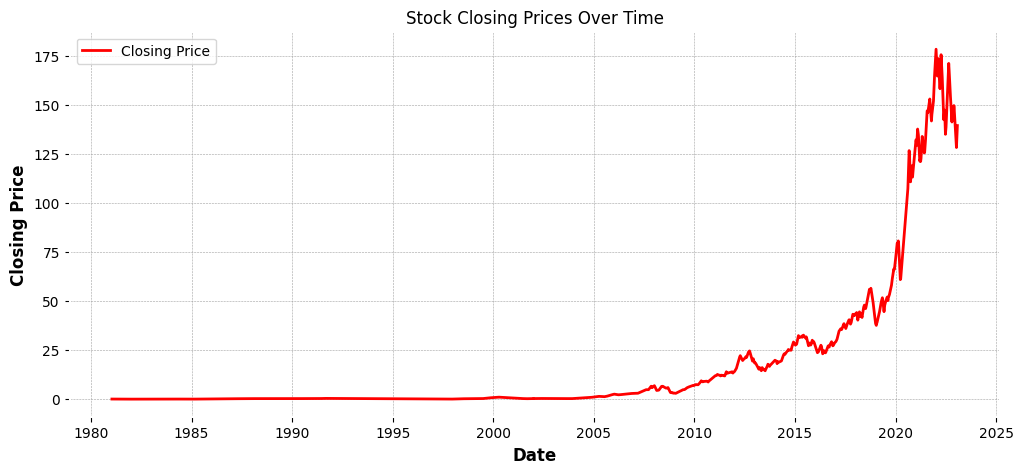

In [62]:
dix = df['Close'].rolling(window=10).mean()  # 10-day MA
cinq = df['Close'].rolling(window=50).mean()  # 50-day MA (longer trend)
plt.figure(figsize=(12, 5))
plt.plot(df.index, dix, label='Closing Price', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Closing Prices Over Time')
plt.legend()
plt.show()

In [63]:
df['Volume'] == float('nan')

Date
1981-01-02    False
1981-01-05    False
1981-01-06    False
1981-01-07    False
1981-01-08    False
              ...  
2023-01-23    False
2023-01-24    False
2023-01-25    False
2023-01-26    False
2023-01-27    False
Name: Volume, Length: 10608, dtype: bool

In [64]:
# Execute a t-test to compare average closing prices across different years.
import scipy.stats as stats

In [65]:
# Execute a t-test to compare average closing prices across different years.
# I should first define Two Groups for the t-Test (Define high-volume and low-volume groups using median as a threshold):
median_volume = df['Volume'].median()
high_volume_days = df[df['Volume'] >= median_volume]['Close']
low_volume_days = df[df['Volume'] < median_volume]['Close']

# Perform t-test
t_stat, p_value = stats.ttest_ind(high_volume_days, low_volume_days, nan_policy='omit')

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -32.59104318990644, P-value: 3.9140760064440366e-222


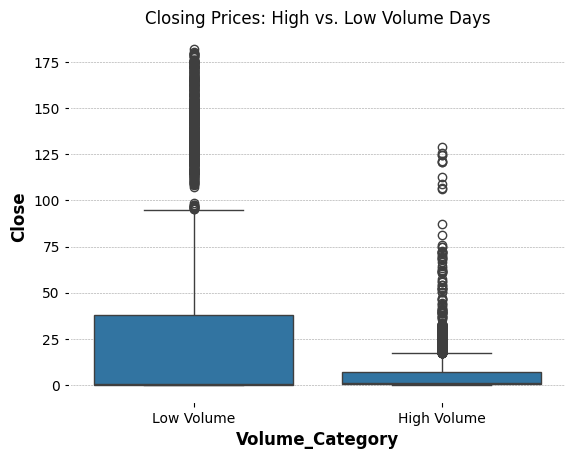

In [66]:
df['Volume_Category'] = df['Volume'].apply(lambda x: 'High Volume' if x >= median_volume else 'Low Volume')

sns.boxplot(x=df['Volume_Category'], y=df['Close'])
plt.title("Closing Prices: High vs. Low Volume Days")
plt.show()

In [ ]:
df['Daily_Returns'] = df['Close'].pct_change()
print(df['Daily_Returns'])

# Examine daily returns’ distribution and test for normality using SciPy.

# To do that I should first Calculate Daily Returns
# (Daily returns measure the percentage change in closing price from one day to the next)

Date
1981-01-02         NaN
1981-01-05   -0.021738
1981-01-06   -0.044448
1981-01-07   -0.042633
1981-01-08   -0.020242
                ...   
2023-01-23    0.023500
2023-01-24    0.010063
2023-01-25   -0.004701
2023-01-26    0.014803
2023-01-27    0.013684
Name: Daily_Returns, Length: 10608, dtype: float64


In [68]:
print(df.corr())

ValueError: could not convert string to float: 'Low Volume'